In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

https://towardsdatascience.com/text-classification-in-python-dd95d264c802

In [2]:
%time datos = pd.read_excel('../Tickets_final.xlsx')

Wall time: 4.98 s


In [3]:
# %time datos = pd.read_excel('Tickets 2018-2021.xlsx')

In [4]:
datos.shape

(46218, 8)

In [5]:
datos.isnull().sum()

Assignment Group        0
Business duration       0
Created                 0
Closed                222
Company                 5
Category 1            424
Category 2            424
Clean                2821
dtype: int64

In [6]:
datos['Created']=pd.to_datetime(datos['Created'])

In [7]:
datos.query("Created>'2020-12-16'",inplace=True)

In [8]:
datos.shape

(43918, 8)

In [9]:
# datos=datos.append(pd.read_excel('Tickets-Julio-Nov-2021 Clean.xlsx')).reset_index(drop=True)

In [10]:
# datos.shape

In [11]:
datos.drop(columns=[
                    # 'Number',
                    # 'City',
                    # 'State',
                    # 'State / Province',
                    # 'Country',
                    'Business duration',
                    'Created',
                    'Closed',
                    # 'Opened by',
                    'Category 2',
                    # 'Country Name',
                    # 'Cost Center Name',
                    'Assignment Group'
                   ],inplace=True)

In [12]:
datos.dropna(subset=['Clean','Category 1'],inplace=True)
datos.shape

(40691, 3)

In [13]:
datos.isnull().sum()

Company       1
Category 1    0
Clean         0
dtype: int64

In [14]:
datos.drop(index=datos.query("`Category 1`=='Workday NA'").index,inplace=True)
datos.shape

(39890, 3)

In [15]:
datos.Company.value_counts()

xLafarge US               19350
xLafarge Canada - ECAN    12372
xLafarge Canada - WCAN     4217
HOLCREST                   2058
xLafarge NA                1892
Name: Company, dtype: int64

In [16]:
datos.query("Company=='xLafarge US'",inplace=True)
datos.shape

(19350, 3)

In [17]:
datos['Category 1'].value_counts()

Admin                      6515
Mylife                     4459
Master Data Input          3611
Payroll                    1898
Bswift                     1075
OM (organizationa mgmt)     514
Leaves                      305
Year-End                    197
Time                        185
Systems NA                  180
HR Request                  147
Interface Input             116
External Request             71
Employee Request             27
Certified Payroll            26
Sun Life Request             11
Audit                         9
Reprint Request               2
Pay Admin Request             2
Name: Category 1, dtype: int64

In [18]:
datos.drop(index=datos.query("`Category 1`=='Sun Life Request'").index,inplace=True)
datos.shape

(19339, 3)

In [19]:
datos

,Company,Category 1,Clean
1,xLafarge US,Mylife,arval death notifitication of death ssn spouse...
3,xLafarge US,Mylife,cd d jr retiree death notification no benefits...
7,xLafarge US,Admin,corporate efax message from s have received a ...
21,xLafarge US,Admin,corporate efax message from spandsp fax ident ...
22,xLafarge US,Admin,corporate efax message from spandsp fax ident ...
...,...,...,...
46202,xLafarge US,OM (organizationa mgmt),is currently listed under project manager he n...
46208,xLafarge US,OM (organizationa mgmt),please change position name of position to ele...
46212,xLafarge US,OM (organizationa mgmt),update position to reflect floating manager po...
46213,xLafarge US,OM (organizationa mgmt),update subgroup to


In [20]:
datos.drop(columns=['Company'],inplace=True)

In [23]:
conteo_categorias=datos['Category 1'].value_counts()
tabla_categorias=pd.DataFrame()
tabla_categorias['conteo']=conteo_categorias
tabla_categorias['porcentaje']=(conteo_categorias/datos.shape[0]*100)
tabla_categorias['acumulado']=tabla_categorias['porcentaje'].cumsum()
tabla_categorias

,conteo,porcentaje,acumulado
Admin,6515,33.688402,33.688402
Mylife,4459,23.057035,56.745437
Master Data Input,3611,18.672113,75.417550
Payroll,1898,9.814365,85.231915
Bswift,1075,5.558716,90.790630
OM (organizationa mgmt),514,2.657842,93.448472
Leaves,305,1.577124,95.025596
Year-End,197,1.018667,96.044263
Time,185,0.956616,97.000879
Systems NA,180,0.930762,97.931641


In [29]:
categorias=tabla_categorias.query("acumulado>86").index
datos = pd.concat([grupo for name,grupo in datos.groupby("Category 1") if name in categorias])

In [36]:
conteo_categorias=datos['Category 1'].value_counts()
tabla_categorias=pd.DataFrame()
tabla_categorias['conteo']=conteo_categorias
tabla_categorias['porcentaje']=(conteo_categorias/datos.shape[0]*100)
tabla_categorias['acumulado']=tabla_categorias['porcentaje'].cumsum()
tabla_categorias

,conteo,porcentaje,acumulado
Bswift,1075,37.640056,37.640056
OM (organizationa mgmt),514,17.997199,55.637255
Leaves,305,10.679272,66.316527
Year-End,197,6.897759,73.214286
Time,185,6.477591,79.691877
Systems NA,180,6.302521,85.994398
HR Request,147,5.147059,91.141457
Interface Input,116,4.061625,95.203081
External Request,71,2.485994,97.689076
Employee Request,27,0.945378,98.634454


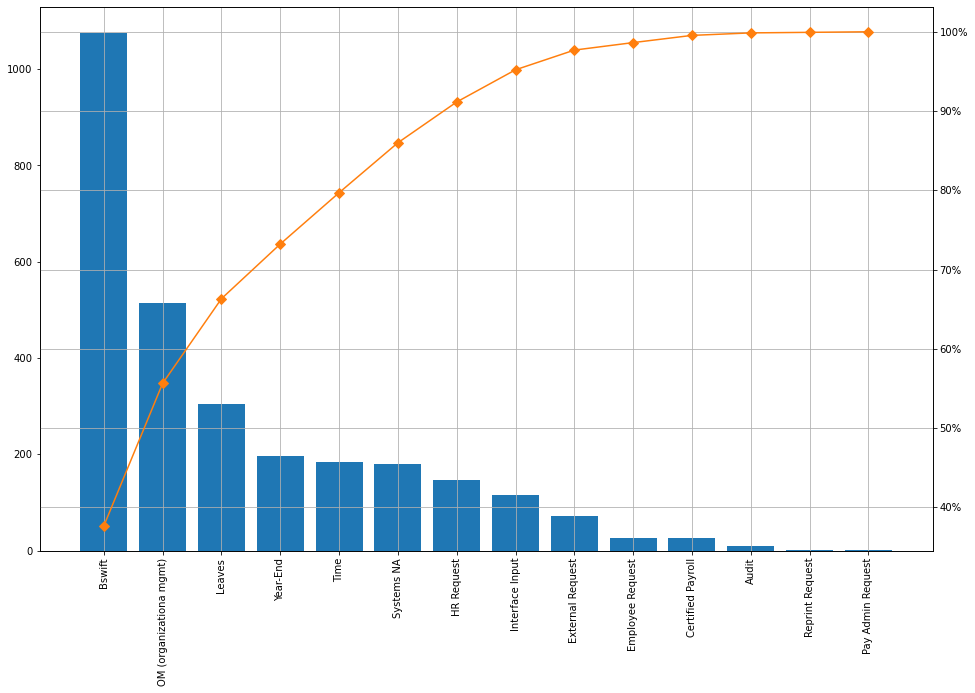

In [37]:
fig, ax = plt.subplots(figsize=(16,10))
ax.bar(tabla_categorias.index, tabla_categorias["conteo"], color="C0")
ax.grid(axis='x')
ax2 = ax.twinx()
ax2.plot(tabla_categorias.index, tabla_categorias["acumulado"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.grid()
ax.tick_params(axis="y")
ax2.tick_params(axis="y")
ax.tick_params(axis="x",labelrotation=90)
ax2.tick_params(axis="x",labelrotation=90)
plt.show()

In [38]:
llaves=tabla_categorias.query("acumulado<86").index
etiquetas={llave:valor for llave,valor in zip(llaves,[i for i in range(1,llaves.shape[0]+1)])}
etiquetas

{'Bswift': 1,
 'OM (organizationa mgmt)': 2,
 'Leaves': 3,
 'Year-End': 4,
 'Time': 5,
 'Systems NA': 6}

In [39]:
datos['etiquetas']=datos['Category 1'].apply(lambda categoria: etiquetas[categoria] if categoria in etiquetas else 0)

In [40]:
datos.rename(columns={'Category 1':'categorias','Clean':'ticket'}).to_csv('data_clean.csv',index=False)